<a href="https://colab.research.google.com/github/Prashant2810/Turing-Technologies-ML-Internship/blob/main/Turing_Tech_ML_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
df=pd.read_csv('tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


<Axes: >

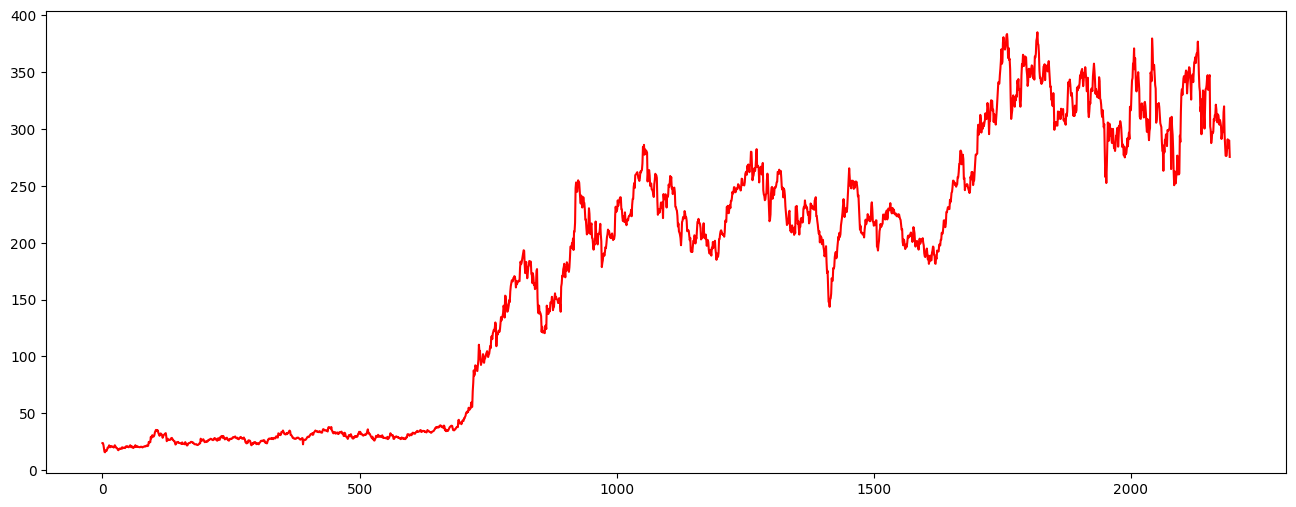

In [ ]:
df['Adj Close'].plot(figsize=(16,6),color='red')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-23-b9c6864122be>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [ ]:
output=pd.DataFrame(df['Adj Close'])
features=['Open','High','Low','Volume']

In [ ]:
# Extract closing prices
dates = df['Date'].values
data=df['Close'].values
data=data.reshape(-1, 1)

In [ ]:
# Normalization
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.73986996],
       [0.74257852],
       [0.70322317]])

In [ ]:
def create_sequences(data, dates, seq_length):
    sequences = []
    labels = []
    sequence_dates = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
        sequence_dates.append(dates[i + seq_length])
    return np.array(sequences), np.array(labels), np.array(sequence_dates)

seq_length = 60
X, y, sequence_dates = create_sequences(scaled_data, dates, seq_length)

In [ ]:
# Split data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = sequence_dates[:split], sequence_dates[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1706, 60, 1) (1706, 1)
(427, 60, 1) (427, 1)


In [ ]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(seq_length,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model
history=model.fit(X_train,y_train,epochs=20, batch_size=32,validation_data=(X_test,y_test))

print("Model training completed.")

Epoch 1/20
54/54 [==============================] - 14s 168ms/step - loss: 0.0195 - val_loss: 0.0032
Epoch 2/20
54/54 [==============================] - 4s 81ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 3/20
54/54 [==============================] - 4s 74ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 4/20
54/54 [==============================] - 3s 51ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 5/20
54/54 [==============================] - 3s 53ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 6/20
54/54 [==============================] - 3s 53ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 7/20
54/54 [==============================] - 4s 80ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 8/20
54/54 [==============================] - 3s 53ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 9/20
54/54 [==============================] - 4s 69ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 10/20
54/54 [==============================] - 5s 89ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 1

14/14 [==============================] - 0s 15ms/step


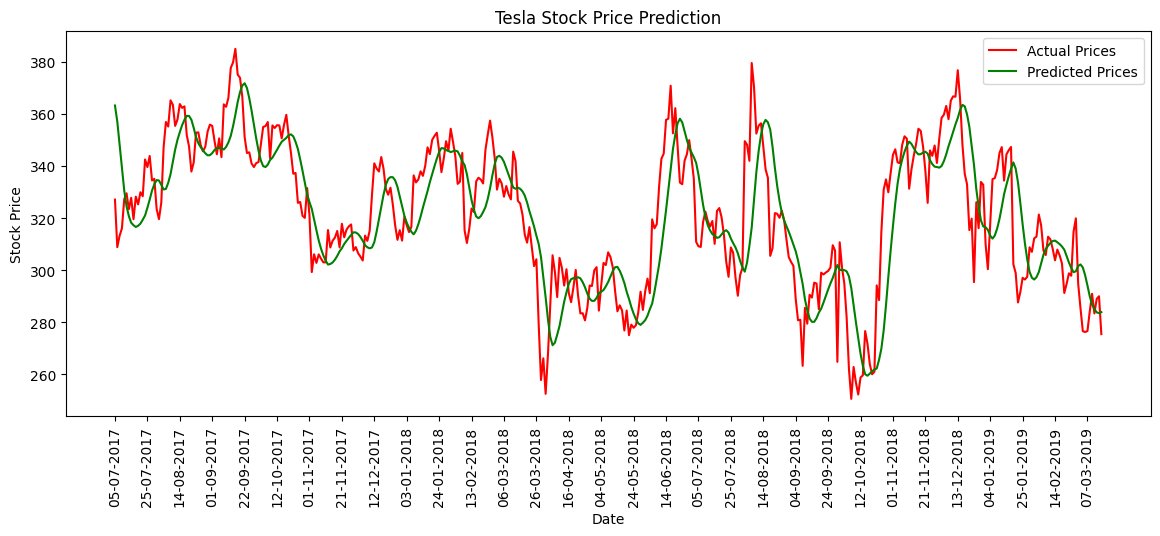

In [ ]:
# Predict on test data
predicted_prices=model.predict(X_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Inverse transform the actual prices
actual_prices=scaler.inverse_transform(y_test.reshape(-1,1))

# Plot the results
plt.figure(figsize=(14,5))
plt.plot(dates_test,actual_prices, color='red',label='Actual Prices')
plt.plot(dates_test,predicted_prices,color='green',label='Predicted Prices')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
step_size=len(dates_test)//30
plt.xticks(dates_test[::step_size],rotation=90)
plt.show()

In [ ]:
# Prepare new data for prediction
future_data = df
future_data.reset_index(inplace=True)
future_dates=future_data['Date'].values
future_data=future_data['Close'].values.reshape(-1,1)
scaled_future_data=scaler.transform(future_data)

# Create sequences from future data
X_future,_,future_sequence_dates=create_sequences(scaled_future_data,future_dates,seq_length)

# Predict future prices
future_predictions=model.predict(X_future)
future_predictions=scaler.inverse_transform(future_predictions)

# Add predictions to the DataFrame
future_data=pd.DataFrame({'Date':future_sequence_dates,'Actual':future_data[seq_length:].flatten(),'Predicted':future_predictions.flatten()})

print(future_data.tail())

67/67 [==============================] - 2s 23ms/step
            Date      Actual   Predicted
2128  11-03-2019  290.920013  286.778717
2129  12-03-2019  283.359985  285.069580
2130  13-03-2019  288.959991  283.787659
2131  14-03-2019  289.959991  283.464142
2132  15-03-2019  275.429993  283.866119


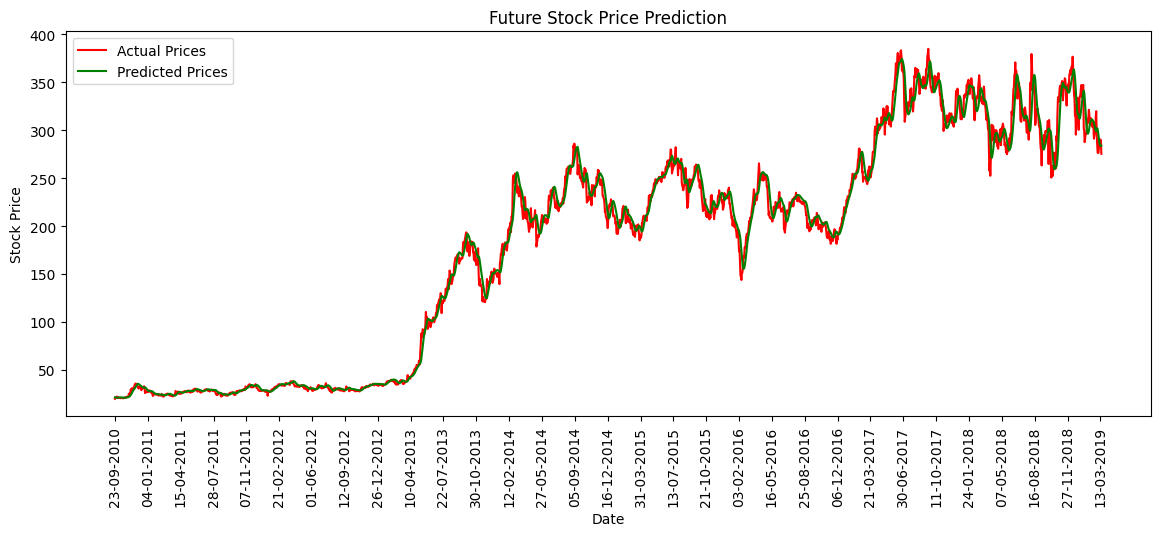

In [ ]:
# Plot the future predictions
plt.figure(figsize=(14,5))
plt.plot(future_data['Date'],future_data['Actual'],color='red', label='Actual Prices')
plt.plot(future_data['Date'],future_data['Predicted'],color='green',label='Predicted Prices')
plt.title('Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
step_size=len(future_data['Date'])//30
plt.xticks(future_data['Date'][::step_size],rotation=90)
plt.show()

In [ ]:
#Calculate scores for model evaluation
scores = f'''

{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, model.predict(X_train))}\t{r2_score(y_test, model.predict(X_test))}
{'MSE'.ljust(10)}{mean_squared_error(y_train, model.predict(X_train))}\t{mean_squared_error(y_test, model.predict(X_test))}
'''
print(scores)

14/14 [==============================] - 0s 14ms/step


Metric           Train                Test        
r2_score  0.9930157161813907	0.6081427122210654
MSE       0.0005037986062458553	0.002149188650746901

